In [1]:
# Instalación de paquetes
!pip cache purge
!pip install transformers
!pip install gensim
!pip install pandas==2.2.2
!pip install tf-keras
!pip install datasets
!pip install sentencepiece
!pip install spacy
!pip install unidecode
!pip install pymupdf

# Importación de librerías
import fitz  # pymupdf
import pandas as pd
import numpy as np
import re
import spacy
import torch
from datasets import Dataset
from unidecode import unidecode

Files removed: 0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 97.6 MB

In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1' # Establece la versión legacy
os.environ["WANDB_DISABLED"] = "true"

In [3]:
!wget  'https://drive.google.com/uc?id=19jXdP0q6XikFyge-lfCeSYqARkcZQnwy&export=download' -O 'pdf01.pdf'  # 0.Guia de Actividades Autonomas .pdf
!wget  'https://drive.google.com/uc?id=1-mwAcs1hMpi2lyyVhXmbbi5Mzn7A4zyi&export=download' -O 'pdf02.pdf'  # 1.clausulado-Livianos-Particulares-27082024-AUTO58VERSION23-1.pdf
!wget  'https://drive.google.com/uc?export=download&id=1Otw2TbiTRbD93uXOSezMnwOh6h7zbY6j' -O 'pdf03.pdf'  # 2.clausulado_AUT058VERSION18.pdf
!wget  'https://drive.google.com/uc?export=download&id=1gTlporKQI3GVfewFJiX6950LPoIKpeFZ' -O 'pdf04.pdf'  # 3.FAQ-Autos.pdf
!wget  'https://drive.google.com/uc?export=download&id=1Hh6LrgcddCvveiQm2_pK5Wb-iymYGffJ' -O 'pdf05.pdf'  # 4.FinanciaciondePolizas-InstructivoWiipo.pdf
!wget  'https://drive.google.com/uc?export=download&id=1bRej-B5DnOIJ19a_wMulVg_8gNdUjXW8' -O 'pdf06.pdf'  #5.Formato_DesignaciondeBeneficiarioOneroso.pdf
!wget  'https://drive.google.com/uc?export=download&id=1_7DjLsVRvqa7nN4GRvf_ru8SWpBMdNEC' -O 'pdf07.pdf'  #6.Formato_AutorizacióndePagos.pdf
!wget  'https://drive.google.com/uc?export=download&id=14Hk3DJJEsy_vnJtsEO4q8nak3eZuU1Mi' -O 'pdf08.pdf'  #7.Autos-ManualAperturadeSiniestros.pdf
!wget  'https://drive.google.com/uc?export=download&id=1GX29dpXk-VKYxhZyVh_Q0Bd7hwbU8zFn' -O 'pdf09.pdf'  #8.Autos-InspeccionesaDomicilio.pdf
!wget  'https://drive.google.com/uc?export=download&id=1pGpz_Rjuh72suO5ttqTvuE-xMC2JBApC' -O 'pdf10.pdf'  #9.DN-26-01-22-Gobernanza-para-la-vinculación-y-conocimiento-de-clientes.pdf
!wget  'https://drive.google.com/uc?export=download&id=1JMHAPIZPFBnAZwOqV-lJ2T6-OHZoUlun' -O 'pdf11.pdf'  #10.FAQ_SARLAFT.pdf
!wget  'https://drive.google.com/uc?export=download&id=1dfvWI6gf5oR0H7XGVKBq-HTm8rK3bPEg' -O 'pdf12.pdf'  #11.instructivo-gestion-clientes-PEP.pdf
!wget  'https://drive.google.com/uc?export=download&id=1RF6jQCEv-eaciz4wPX11HLhqA6oW-LPw' -O 'pdf13.pdf'  #12.Manual de autos 2023.pdf
!wget  'https://drive.google.com/uc?export=download&id=12CWBs1rXJb170q9zCk_kN7vMjpC_8E3K' -O 'pdf14.pdf'  #13.Manual-Formulario-de-Conocimiento-del-Cliente.pdf
!wget  'https://drive.google.com/uc?export=download&id=1-Iz0LdBMylUhMIrf21xcCT1ru96G23Uc' -O 'pdf15.pdf'  #14.ManualUsoDebAut-ManualDebitoAutomaticoXXXX.pdf
!wget  'https://drive.google.com/uc?export=download&id=1V_rYVqg1hL-FpPdL7o7eTfWXyR924BSF' -O 'pdf16.pdf'  #15.MODF26-01-22-Manual-SARLAFT-Allianz-Seguros-SA.pdf
!wget  'https://drive.google.com/uc?export=download&id=1uMHyvo_XxMRVoI6TEaSj7H1Kv_BAIo1N' -O 'pdf17.pdf'  #16.Instructivo-indexacion-de-documentos-Sep2023.pdf

total_bytes = 0
nbytes=0
for i in range(1, 18):
    pdf_filename = f"pdf{i:02d}.pdf"
    #display ("ojo:",pdf_filename)
    nbytes = os.stat(pdf_filename).st_size
    total_bytes = total_bytes + nbytes
display ("total_bytes:",total_bytes)
megabytes = total_bytes / 1048576
display ("Total megabytes de todos los documentos cargados:",megabytes)

--2024-12-05 23:08:27--  https://drive.google.com/uc?id=19jXdP0q6XikFyge-lfCeSYqARkcZQnwy&export=download
Resolving drive.google.com (drive.google.com)... 142.250.101.139, 142.250.101.113, 142.250.101.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19jXdP0q6XikFyge-lfCeSYqARkcZQnwy&export=download [following]
--2024-12-05 23:08:27--  https://drive.usercontent.google.com/download?id=19jXdP0q6XikFyge-lfCeSYqARkcZQnwy&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 875376 (855K) [application/octet-stream]
Saving to: ‘pdf01.pdf’

pdf01.pdf           100%[===================>] 854.86K  --.-KB/s  

'total_bytes:'

35253137

'Total megabytes de todos los documentos cargados:'

33.62001132965088

In [4]:
####  PRE-PROCESAMIENTO
!python -m spacy download es_core_news_sm
# Definir patrones de reemplazo
pat = re.compile(r"[^\w\s%]")
spaces = re.compile(r"\s{2,}")

# Función de preprocesamiento
def preprocess(text):
    # Eliminamos texto irrelevante específico
    text = text.replace("Internal", "")
    text = text.replace("27/08/2024-1301-P-03-AUTO58VERSION23-DR0I", "")
    text = text.replace("07/03/2023-13-NT-P-03-AZCNTAutos2023", "")

    # Normalizamos el texto - Minusculas
    text = unidecode(text).lower()
    text = text.replace("allianz", "america")

    # Reemplazo de URLs por marcadores temporales
    urls = re.findall(r'https?://\S+|www\.\S+', text)
    for i, url in enumerate(urls):
        text = text.replace(url, f'URL{i}')

    # Eliminamos: caracteres especiales, espacios duplicados, saltos de página

    text = re.sub(pat, "", text)
    text = re.sub(spaces, " ", text)
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Restaurar las URLs
    for i, url in enumerate(urls):
        text = text.replace(f'URL{i}', url)
##############################
# Para hacer analisis exploratorio Nubes Palabras. Quitar despues
    nlp = spacy.load('es_core_news_sm',
            exclude=['parser', 'senter', 'lemmatizer', 'ner'])
    doc = nlp(text) # creamos un documento de spacy
    no_stops = " ".join(
        token.text
        for token in filter(
            lambda token:
                           not token.is_stop  # eliminamos stopwords
                           and len(token) > 3 and len(token) < 24 # eliminamos palabras por longitud
                           and token.pos_ in ['NOUN', 'PROPN'], # dejamos solo sustantivos o nombres propios
            doc,
            )
        )
    documento = " ".join(no_stops.split())
    return documento

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 107.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
#######################################################
## Tokenización con transformers  TRANSFER LEARNING   #
#######################################################
#
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, TrainingArguments, Trainer
#
#checkpoint = "Sebastian77/distilbert-base-uncased-finetuned-squad_es"
#checkpoint = ("dccuchile/bert-base-spanish-wwm-cased")
checkpoint = ("bert-large-uncased-whole-word-masking-finetuned-squad")
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)
model.config.hidden_dropout_prob = 0.4

#model = AutoModelForQuestionAnswering.from_pretrained(checkpoint,hidden_dropout_prob=0.3)
# Aplicar preprocesamiento y tokenización
def tokenize_text(text):
    preprocessed_text = preprocess(text)
    tokenized_data = tokenizer(preprocessed_text, return_tensors="tf", padding=True, truncation=True)
    return tokenized_data
#######################################################
#   CARGAMOS LOS DOCUMENTOS                           #
#######################################################
import random
corpus = []
prep_corpus = []
#text = ""
for i in range(1, 18):
    # Formatear el nombre del archivo PDF
    pdf_filename = f"pdf{i:02d}.pdf"
#    display ("pdf_filename:",pdf_filename)
    # Abrir el archivo PDF
    pdf_document = fitz.open(pdf_filename)
    # Inicializar el texto del documento
    doc_text = ""
    # Iterar sobre las páginas del PDF
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        doc_text += page.get_text("text")
    doc_text = preprocess(doc_text)
    prep_corpus.append(preprocess(doc_text))
    corpus.append(doc_text)
    display ("pdf_filename:",pdf_filename)
    display ("Texto: ",corpus[i-1])

"""
    Dejamos prep_corpus.append(preprocess(doc_text))
    Para hacer analisis exploratorio. Luego cambiar
    por las siguientes lineas:
    tokenized_data = tokenize_text(doc_text)
    prep_corpus.append(tokenized_data)
"""

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'pdf_filename:'

'pdf01.pdf'

'Texto: '

'hogar empresa guia actividades siniestros vida guia actualizara actividades cotizacion emision negocio informacion traves peticion datos cancelacion polizas sustitucion alta modificacion polizas inclusion riesgos polizas valor suplementos valor desbloqueo polizas sucursal reemplazos guia valores solicitud emision placa emision poliza solicitud leasing extension descuento poliza vehiculos millones desafectacion polizas modificaciones intermediario cartas reclamacion habilitacion creacion codigo solicitud ajuste prima valor cotizacion emision retencion polizas renovacion extension descuento persona descuentos clientes version 2019 salud cotizacion emision negocio informacion traves peticion datos cancelacion polizas sustitucion alta inclusion modificacion polizas desbloqueo polizas compania indexacion declaracion salud modificaciones valor documentos unidad modificaciones valor certificaciones embajada orden solicitud negocio certificaciones retefuente solicitud impresion carnes salud s

'pdf_filename:'

'pdf02.pdf'

'Texto: '

'fecha nombre contrato seguro condiciones informacion derechos obligaciones www.america.com.co titulo codigo comercio normas materia expectativas seguro placer cobertura necesidades prevision aseguramiento bienvenida america disposicion romero representante condiciones contrato seguro livianos clausulas seguro tabla ubicacion exclusiones amparos poliza exclusiones amparos iiii responsabilidad asistencia proceso amparo gastos movilizacion perdidas lesiones muerte accidente transito reemplazo mano continuacion descripcion exclusiones tabla exclusiones amparos asistencias hurto vehiculo lesiones muerte terceros bienes origen extension consecuencia eventos vehiculo marcha marcha accidente reparaciones funcionamiento personas mantenimiento vehiculo ayudantes conductor operaciones procedimientos vehiculo condiciones conductor vehiculo conyuge companeroa parientes consanguinidad afinidad grado asegurado conductor exclusion amparo lesiones muerte accidente transito transporte mercancias sustan

'pdf_filename:'

'pdf03.pdf'

'Texto: '

'fecha expedicion nombre condiciones contrato seguro expectativas seguro placer cobertura necesidades prevision aseguramiento firma compania seguros torre no2924 bogota colombia xxxx no2924 colombia condiciones capitulo datos objeto alcance seguro capitulo siniestros capitulo administracion poliza capitulo cuestiones caracter contrato seguro caratula poliza condiciones solicitud seguro asegurado formularios asegurabilidad anexos poliza conformidad articulo codigo comercio mora pago prima poliza certificados anexos fundamento terminacion contrato derecho compania pago prima gastos ocasion expedicion contrato compania cobertura ningun ningun beneficio medida otorgamiento cobertura pago reclamacion otorgamiento beneficio compania sancion prohibicion restriccion resoluciones decisiones norma naciones unidas union europea reino unido bretana irlanda norte unidos america regulacion compania cumplimiento deber consideracion tomador presente condiciones disposicion pagina www.america.co traves

'pdf_filename:'

'pdf04.pdf'

'Texto: '

'autos preguntas circunstancia poliza poliza poliza asegurado accidente asegurado vehiculo asegurado patios responsable siniestro contenido documentos reclamacion autorizacion reparacion vehiculo vehiculo vehiculo valor reparacion danos vehiculo vehiculo documentacion atencion asegurado salvamento salvamento cliente caso lesiones asegurado tiempo derecho vehiculo reemplazo asegurado producto mano vehiculo asegurado tramites transito servicio domicilio tramites asegurado valor prima vehiculo asegurado impuestos vehiculo devolucion responsabilidad civil extracontractual circunstancia poliza siniestro poliza consecuencia siniestro asegurado responsable evento circunstancias hechos ejemplo accidente vehiculos responsable asegurado complejidad evento claridad responsabilidad poliza siniestro asegurado documentos solicitud prueba responsabilidad poliza asegurado accidente sugerencia seguro seguro garantias cobertura tramite indemnizacion poliza america vehiculo posterioridad reembolso casos 

'pdf_filename:'

'pdf05.pdf'

'Texto: '

'respaldo confianza wiipo wiipo plataforma valor aseguradoras clientes creditos polizas seguros innovadora experiencia servicio oportuna wiipo cadena valor compania gestion financiacion poliza modulos agencia experiencia agentes ingreso numero cedula agencia contrasena correo podras alternativas wiipo inicio pantalla inicio aplicacion dashboard opciones administracion gestion creditos aplicacion wiipoco creditos seguimiento creditos tramite creditos podras creditos informacion valor cuotas monto creditos podras creditos numero identificacion credito nombre cliente ciudadania valor credito fecha firma aprobacion cartera creditos paga cuota credito plan pagos gestion creditos opcion creditos financiacion poliza simulador credito cliente valores simulador credito monto financiacion numero cuotas credito valor cuota cuotas solicitud diligencia datos cliente solicitud vinculacion credito nombre numero cedula sistema campos requieres campos forma operacion plazo financiacion meses simulador 

'pdf_filename:'

'pdf06.pdf'

'Texto: '

'senores ciudad asunto beneficiario autorizacion renovacion identificadoa cedula ciudadaniade extranjeria manifiesto america forma calidad beneficiario poliza vehiculo placa persona continuacion nombre beneficiario virtud designacion compania vigencia contrato seguro vencimiento periodo meses prima vigencia totalidad constancia ciudad firma tomador firma asegurado nombre nombre identificacion identificacion'

'pdf_filename:'

'pdf07.pdf'

'Texto: '

'version banco estructura cuentas entidad entidad validacion corriente scotiabank colpatria banco occidente banco caja villas banco digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos banco bogota banco banco citibank banco sudameris banco bbva digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos digitos falabella digitos digitos digitos digitos vinculo persona'

'pdf_filename:'

'pdf08.pdf'

'Texto: '

'capacitacion siniestros allia2net vicepresidencia indemnizaciones gerencia indemnizaciones canal notificacion siniestros autos traves herramienta plus oportunidad intermediario cliente manual acceso siniestros cartera manual acceso fecha ocurrencia siniestro apertura siniestros opcion notificacion siniestros datos reporte siniestro acceso siniestros manual acceso familias vehiculo totalidad vehiculo asegurado siniestro objeto vehiculo ejemplo asegurado cuneta dano accidente vehiculo objeto persona asegurado siniestro perjuicio raiz reclamacion ejemplo siniestro casa vehiculo poste energia apertura siniestros circunstancia familia vehiculo manual acceso familia apertura siniestros vehiculo causa intento hurto vehiculo momento hurto causa intento vehiculo totalidad notificacion siniestro traves linea totalidad vehiculo piezas manual acceso familia vehiculo causa apertura siniestros indique vehiculo raiz marcha hinchas equipo personas intencion vehiculo partes vandalismo vehiculo siniest

'pdf_filename:'

'pdf09.pdf'

'Texto: '

'inspecciones domicilio ramo marzo servicio inspecciones bucaramanga barranquilla cali bogota vehiculos caracteristicas domicilio costo cliente emision poliza intermediario opcion envio solicitud condiciones funcionalidad linea poliza concepto inspector contacto persona domicilio datos lugar hora inspeccion tiempos atencion servicio tiempo respuesta habil intervencion sucursal diapositiva condiciones inspeccion domicilio condiciones proceso inspeccion domicilio livianos servicio antiguedad lugar inspeccion bogota bucaramanga barranquilla cali perimetro productos livianos intermediarios proceso inspeccion domicilio emision poliza bloqueo verificacion riesgo bloqueo orden inspeccion domicilio intermediario datos contacto gestion comunicacion contacto informacion cita inspeccion inspeccion linea resultado inspeccion inspecciones siniestros ubicacion vehiculo modelo vehiculo resultado inspeccion poliza proceso emision intermediario poliza cliente inspeccion procedimiento proceso inspeccion

'pdf_filename:'

'pdf10.pdf'

'Texto: '

'documento interno formato formato validez gobernanza vinculacion conocimiento clientes proposito roles responsabilidades proceso vinculacion clientes clientes companias vida fondo pensiones proceso conocimiento cliente directrices proceso vinculacion contrapartes actividades vinculacion clientes companias emision renovacion polizas actualizacion informacion clientes conocimiento cliente actividades intermediarios unidades gerencia operaciones cliente gerencia compliance circular compania procedimiento conocimiento cliente roles responsabilidades gerencia compliance aprobacion junta companias procedimientos riesgos mecanismo conocimiento cliente cumplimiento instrucciones superintendencia grupo prevencion riesgo lavado activos financiacion terrorismo informacion clientes clientes efectos diligencia companias conocimiento cliente validacion identidad consulta listas control prevencion riesgo lavado activos financiacion terrorismo areas linea actividades conocimiento cliente cumplimiento

'pdf_filename:'

'pdf11.pdf'

'Texto: '

'sarlaft manual preguntas siglas sarlaft sistema administracion riesgo lavado activos financiacion terrorismo sarlaft implementacion funcionamiento sistema administracion riesgo lavado activos financiacion terrorismo sarlaft entidades riesgo operaciones activos actividades lavado activos terrorismo cliente sarlaft ficha gestion manual sarlaft clientes poliza america vida formato conocimiento cliente ficha gestion caso polizas documento cancelacion polizas cliente polizas documento sarlaft norma polizas salud accidentes vuelo tomados entidades demas manual sarlaft formato conocimiento cliente formato conocimiento cliente ficha gestion cliente formato conocimiento cliente ficha gestion cliente codigo 2612 informacion anexo video link poliza formato conocimiento cliente norma negocio formato conocimiento cliente momento emision razon gestion documento ficha gestion cliente codigo 2612 cliente poliza caso actualizacion documento sistema formato conocimiento cliente vigencia poliza poliza c

'pdf_filename:'

'pdf12.pdf'

'Texto: '

'clientes america experiencias clave clientes necesidades informacion encontraras archivo clientes personas mente cargo familiares asociados capacidad decisiones expedicion normas direccion manejo bienes administracion justicia administracion valores tipos personas funcion publica nivel senadores gobernadores alcaldes empresas relacion personas sociedad derecho grado consanguinidad afinidad alcalde bogota hijo magistrado personas accionistas miembros junta administradores calidad persona funciones pais jefes embajadores jefes gobierno organismo personas funciones representantes miembros junta organizaciones secretario nota persona calidad nombramiento anos cargo forma desvinculacion terminacion contrato calidad diligenciamiento formulario conocimiento cliente sistema verificacion identidad cliente vinculacion actualizacion poliza cliente persona representante miembro junta accionista persona sistema poliza iberosam codigos bloqueo descripcion 8014 tomador 8017 representante tomador rep

'pdf_filename:'

'pdf13.pdf'

'Texto: '

'guia suscripcion actualizacion marzo categorias riesgo paquetes cobertura llave mano remolques riesgos limite valor transporte combustibles placa carroceria transporte pasajeros servicio ambulancias marcas motos riesgos marcas tipos proceso suscripcion vigencia validez estudio cotizacion tipos placa codigo codigos desactualizados modificacion valores livianos valor vehiculos vehiculos sistema blindaje contrato seguro tomador interes propietario propietario edad genero ciudad circulacion ciudad matricula bonificacion descuento descuento 3123 descuento persona tabla contenido actualizacion marzo 3124 descuento persona descuento 3126 formas pago vigencia poliza inspeccion inspecciones domicilio dispositivo rastreo recuperacion condiciones politica instalacion mayo instalacion vehiculos instalacion dispositivo documentos expedicion vehiculos documentos consideraciones aspectos salvamentos proceso coaseguro indexacion soportes negocios coaseguro anexos inspecciones domicilio politicas caza

'pdf_filename:'

'pdf14.pdf'

'Texto: '

'manual documentacion conocimiento cliente intermediarios descripcion dashboard intermediario gestiones gestion formulario conocimiento cliente asegurabilidad declaracion salud descripcion descripcion traves plataforma compania seguros procesos creacion formularios conocimiento cliente tipos polizas documentos vigencia contenido contenido usuario clic boton plataforma vista dashboard caso contrasena contrasena plataforma mostrara ventana codigo email boton contenido plataforma mensaje proceso clic boton plataforma seras vista sesion enlace seras vista contrasena contrasena caracteristicas seguridad contrasena contenido dashboard panel sistema dashboard plataforma secciones submodulos perfil intermediario contenido gestiones clic sistema gestiones podras gestiones clave gestiones valores clic boton informacion campos gestion clic boton gestion ventana contenido clic boton vista gestion datos gestion campos generacion formulario conocimiento cliente persona persona clic boton vista formu

'pdf_filename:'

'pdf15.pdf'

'Texto: '

'debito registro ingreso proceso inscripcion debito consulta transacciones actualizacion datos opcion debito inscripcion poliza linea comodidad hogar equipos forma podras deseas pago corriente ahorros tarjeta credito debito tranquilidad fechas pago recibos tengas cobro fecha pago recibo modulo pago debito gestion ambicion aseguradora colombia pagina www.america.co pago https www.america.co ingreso pagina opcion debito ambicion aseguradora colombia pagina opcion tipo documento numero identificacion tomador poliza tipo documento numero identificacion opcion sesion registro ingreso usuarios ambicion aseguradora colombia persona persona campos datos tomador poliza politicas tratamiento datos boton clic bienvenido ambicion aseguradora colombia producto polizas ingresa opciones autoshogarempresas salud vida proceso inscripcion debito ambicion aseguradora colombia polizas polizas seleccionarlas recibos cobro fecha pago recibos valor recibo cobro poliza ambicion aseguradora colombia sumatoria 

'pdf_filename:'

'pdf16.pdf'

'Texto: '

'politicas procedimientos sistema administracion riesgo activos financiacion terrorismo objeto alcance ambito aplicacion marco marco riesgo lavado activos financiacion terrorismo alcance sistema administracion riesgo lavado activos financiacion terrorismo sarlaft etapas sistema administracion riesgo lavado activos financiacion terrorismo elementos sistema administracion riesgo lavado activos financiacion terrorismo procedimientos mecanismos sarlaft instrumentos sarlaft documentacion estructura infraestructura divulgacion informacion capacitacion sanciones definiciones anexo politicas administracion sarlaft anexo politicas etapas sarlaft anexo politicas elementos sarlaft anexo integrated risk control system guideline anexo metodologia administracion riesgo objeto procedimientos instrumentos administracion gestion sistema administracion riesgo lavado activos financiacion terorrismo america desarrollo actividades objeto compania conformidad regulacion superintendencia colombia traves oper

'pdf_filename:'

'pdf17.pdf'

'Texto: '

'anexo indexacion documentos documentos referencia sociedades entidades comentarios conocimiento cliente vigencia documento compania empresas acta posesion sociedades economia inspeccion vigilancia superfinanciera colombia copia cedula representante ficha gestion cliente representante sociedad resolucion adjudicacion ficha gestion cliente entidades existencia representacion vigencia persona establecimiento comercio documentos referencia comentarios conocimiento cliente vigencia documento compania documento identificacion persona firma clientes proceso ejemplo camara comercio establecimiento comercio vigencia persona documentos referencia comentarios conocimiento cliente vigencia documento compania documento identificacion persona firma clientes proceso ejemplo informacion titular caso apertura producto suscripcion poliza intermedio apoderado debera documentos referencia comentarios documento identificacion persona ficha gestion cliente requerimientos'

'\n    Dejamos prep_corpus.append(preprocess(doc_text))\n    Para hacer analisis exploratorio. Luego cambiar\n    por las siguientes lineas:\n    tokenized_data = tokenize_text(doc_text)\n    prep_corpus.append(tokenized_data)\n'

In [6]:
##############################################################################
display ("SE ENTRENAN VECTORIZADORES  CountVectorizer  TfidfVectorizer   ")#
##############################################################################
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow = CountVectorizer(max_features=500).fit(prep_corpus)
tfidf = TfidfVectorizer(max_features=500).fit(prep_corpus)
##############################################################################
display ("EXTRAEMOS REPRESENTACIONES        ")#
##############################################################################
features_bow = bow.transform(corpus)
features_tfidf = tfidf.transform(corpus)
#display("Matriz BOW:", features_bow.toarray())
#display("Matriz TF-IDF:", features_tfidf.toarray())
##############################################################################
display ("EXTRAEMOS EL VOCABULARIO        ")#
##############################################################################
vocab_bow = bow.get_feature_names_out()
vocab_tfidf = tfidf.get_feature_names_out()
#display('vocab_bow', vocab_bow)
#display('vocab_tfidf', vocab_tfidf)
#

'SE ENTRENAN VECTORIZADORES  CountVectorizer  TfidfVectorizer   '

'EXTRAEMOS REPRESENTACIONES        '

'EXTRAEMOS EL VOCABULARIO        '

In [7]:
##############################################################################
display ("IMPLEMENTAMOS LDA - MODELO GENERATIVO DE sklearn             ")#
##############################################################################
from sklearn.decomposition import LatentDirichletAllocation
#######################################################
#   ENTRENAMOS EL MODELO CON LA REPRESENTACIÓN        #
#   DE BOLSA DE PALABRAS.                             #
#   HIPERPARAMETROS:                                  #
#    n_components....: número de tópicos.             #
#    doc_topic_prior.: valor  α .                     #
#    topic_word_prior: valor  β .                     #
#    random_state....: semilla de números aleatorios. #
#######################################################
lda = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=1 / 20,
    topic_word_prior=1 / 10,
    random_state=42,
    max_iter=10,
    n_jobs = -1,
    ).fit(features_bow)

'IMPLEMENTAMOS LDA - MODELO GENERATIVO DE sklearn             '

'EXTRAEMOS LA MATRIZ: DOCUMENTO - TOPICO '

--------------------------------------------------
MATRIZ DOCUMENTO-TOPICO feature_lda.shape (17, 10)
--------------------------------------------------
(10,)


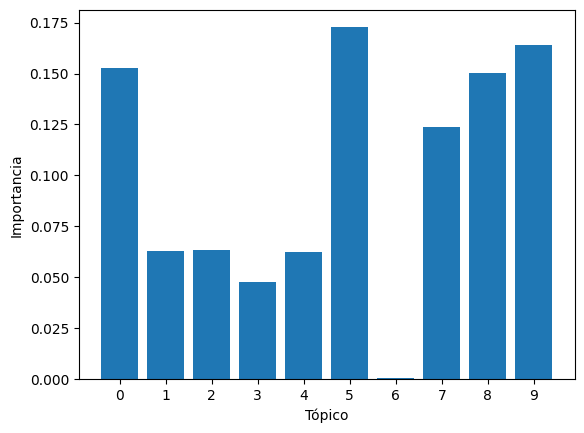

In [8]:
##############################################################################
display ("EXTRAEMOS LA MATRIZ: DOCUMENTO - TOPICO ")#
##############################################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
features_lda = lda.transform(features_bow)
print("-" * 50)
print(f"MATRIZ DOCUMENTO-TOPICO feature_lda.shape {features_lda.shape}")
print("-" * 50)
#######################################################
# IMPORTANCIA POR TOPICO Y DIABRAMA DE BARRAS         #
#######################################################
topic_importances = features_lda.mean(axis=0)
print(topic_importances.shape)
fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size));
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

In [9]:
##############################################################################
display ("EXTRAEMOS LA MATRIZ: TOPICO - TERMINO       ")#
##############################################################################
components = lda.components_
print(f"MATRIZ TOPICO - TERMINO components.shape:  {components.shape}")
# components.shape:  (20, 500)
# Iteramos sobre cada tópico. Mostramos las 15 palabras mas importantes
for i, comp in enumerate(components):
    terms_comp = zip(vocab_bow, np.abs(comp))
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    print("!" * 50)
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

'EXTRAEMOS LA MATRIZ: TOPICO - TERMINO       '

MATRIZ TOPICO - TERMINO components.shape:  (10, 500)
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tópico 0: cliente gestion conocimiento poliza ficha persona formato documento gerencia documentos sarlaft representante compliance proceso manual
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tópico 1: riesgo compania sarlaft cumplimiento administracion operaciones riesgos procedimientos activos control financiacion informacion terrorismo traves junta
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tópico 2: boton clic informacion vista contenido campos cliente sistema documentacion tipo formulario conocimiento beneficiario fecha nombre
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tópico 3: valor descuento millones smmlv riesgo transporte actualizacion marzo vigencia suscripcion poliza vehiculos inspeccion riesgos anos
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Tópico 4: cliente creditos wiipo pagos valor proceso firma numero campos solicitud gestion correo fina

'GENERAMOS NUBES DE PALABRAS       '

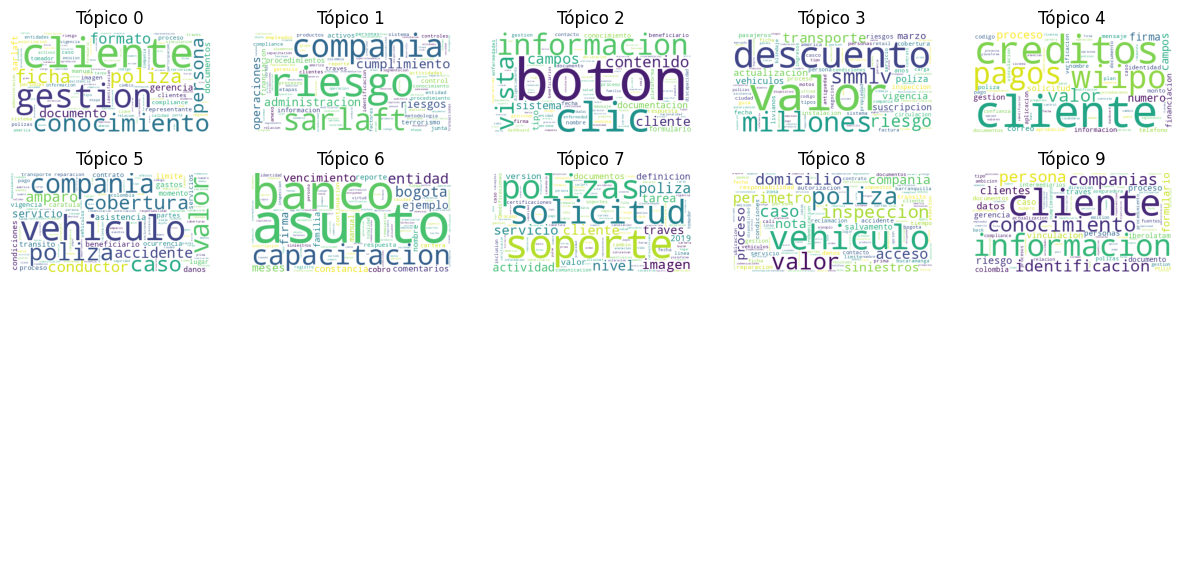

In [10]:
##############################################################################
display ("GENERAMOS NUBES DE PALABRAS       ")#
##############################################################################
from wordcloud import WordCloud
#
fig, axes = plt.subplots(4, 5, figsize=(15, 7))
cont = 0
for i in range(4):
    for j in range(5):
        if cont < len(components):
           ax = axes[i, j]
           freqs = {
               term: abs(float(importance))
               for term, importance in zip(vocab_bow, components[cont])
           }
           wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
           ax.imshow(wc)
           ax.axis("off")
           ax.set_title(f"Tópico {cont}")
           cont += 1
        else:
           axes[i, j].axis("off")